In [1]:
### Data Collection
import pandas_datareader as pdr
#key="60cbcc7406b384b442e972f4ce75433e9742e244"

In [2]:
#df = pdr.get_data_tiingo('TSLA', api_key=key)

In [3]:
#df.to_csv('TSLA.csv')

###Importing Dataset

In [4]:
import pandas as pd

In [5]:
df=pd.read_csv('TSLA.csv')

In [6]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-11-14,37.599998,37.650002,35.638000,36.290001,36.290001,32761000
1,2016-11-15,36.556000,37.285999,36.410000,36.754002,36.754002,19510000
2,2016-11-16,36.529999,36.945999,36.242001,36.785999,36.785999,17172000
3,2016-11-17,36.698002,37.897999,36.422001,37.731998,37.731998,24435500
4,2016-11-18,38.130001,38.599998,37.000000,37.004002,37.004002,26051500


In [7]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-11-14,37.599998,37.650002,35.638000,36.290001,36.290001,32761000
1,2016-11-15,36.556000,37.285999,36.410000,36.754002,36.754002,19510000
2,2016-11-16,36.529999,36.945999,36.242001,36.785999,36.785999,17172000
3,2016-11-17,36.698002,37.897999,36.422001,37.731998,37.731998,24435500
4,2016-11-18,38.130001,38.599998,37.000000,37.004002,37.004002,26051500
...,...,...,...,...,...,...,...
1253,2021-11-05,1228.000000,1239.869995,1208.000000,1222.089966,1222.089966,21579900
1254,2021-11-08,1149.790039,1197.000000,1133.000000,1162.939941,1162.939941,33445700
1255,2021-11-09,1173.599976,1174.500000,1011.520020,1023.500000,1023.500000,59105800
1256,2021-11-10,1010.409973,1078.099976,987.309998,1067.949951,1067.949951,42802700


In [8]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-11-14,37.599998,37.650002,35.638000,36.290001,36.290001,32761000
1,2016-11-15,36.556000,37.285999,36.410000,36.754002,36.754002,19510000
2,2016-11-16,36.529999,36.945999,36.242001,36.785999,36.785999,17172000
3,2016-11-17,36.698002,37.897999,36.422001,37.731998,37.731998,24435500
4,2016-11-18,38.130001,38.599998,37.000000,37.004002,37.004002,26051500


In [9]:
df1=df.reset_index()['Close']

In [10]:
df1

0         36.290001
1         36.754002
2         36.785999
3         37.731998
4         37.004002
           ...     
1253    1222.089966
1254    1162.939941
1255    1023.500000
1256    1067.949951
1257    1063.510010
Name: Close, Length: 1258, dtype: float64

###Plot

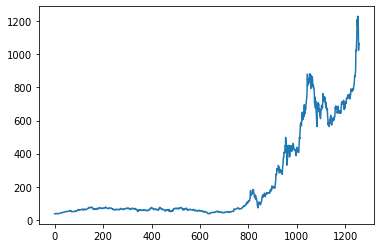

In [11]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [12]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler

In [13]:
import numpy as np

In [14]:
df1

0         36.290001
1         36.754002
2         36.785999
3         37.731998
4         37.004002
           ...     
1253    1222.089966
1254    1162.939941
1255    1023.500000
1256    1067.949951
1257    1063.510010
Name: Close, Length: 1258, dtype: float64

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [16]:
print(df1)

[[4.15371694e-04]
 [8.03944484e-04]
 [8.30740038e-04]
 ...
 [8.27144073e-01]
 [8.64368220e-01]
 [8.60650038e-01]]


###splitting dataset into train and test split

In [17]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [18]:
training_size,test_size

(817, 441)

In [19]:
train_data

array([[0.00041537],
       [0.00080394],
       [0.00083074],
       [0.00162296],
       [0.0010133 ],
       [0.00092956],
       [0.00204335],
       [0.0023733 ],
       [0.00296119],
       [0.00287242],
       [0.00177537],
       [0.0017469 ],
       [0.00048739],
       [0.00041872],
       [0.00131143],
       [0.00115232],
       [0.00237498],
       [0.00223094],
       [0.00221252],
       [0.00225439],
       [0.00321242],
       [0.00330286],
       [0.00311695],
       [0.00393932],
       [0.00397951],
       [0.00499449],
       [0.00481193],
       [0.00493754],
       [0.00575656],
       [0.00679331],
       [0.00682848],
       [0.00598099],
       [0.00581518],
       [0.00636789],
       [0.00804277],
       [0.00800257],
       [0.00838109],
       [0.00876129],
       [0.00852513],
       [0.00850169],
       [0.00847824],
       [0.00984494],
       [0.00948149],
       [0.00994711],
       [0.01085154],
       [0.01101401],
       [0.01171578],
       [0.012

###convert an array of values into a dataset matrix

In [20]:
import numpy

def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [21]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [22]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [23]:
print(X_test.shape), print(ytest.shape)

(340, 100)
(340,)


(None, None)

In [24]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [25]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [26]:
model=Sequential()
model.add(LSTM(50))
model.add(Dense(1,))

In [27]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1),))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1,))
model.compile(loss='mean_squared_error',optimizer='adam')

In [28]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_2 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_3 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [29]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_2 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_3 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [30]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 9s 315ms/step - loss: 2.3865e-04 - val_loss: 0.1918
Epoch 2/100
12/12 [==============================] - 2s 200ms/step - loss: 1.6805e-04 - val_loss: 0.1473
Epoch 3/100
12/12 [==============================] - 2s 200ms/step - loss: 1.1004e-04 - val_loss: 0.0693
Epoch 4/100
12/12 [==============================] - 2s 201ms/step - loss: 6.8484e-05 - val_loss: 0.0052
Epoch 5/100
12/12 [==============================] - 2s 198ms/step - loss: 4.1548e-05 - val_loss: 0.0042
Epoch 6/100
12/12 [==============================] - 2s 199ms/step - loss: 3.2963e-05 - val_loss: 0.0058
Epoch 7/100
12/12 [==============================] - 2s 200ms/step - loss: 3.0466e-05 - val_loss: 0.0078
Epoch 8/100
12/12 [==============================] - 2s 198ms/step - loss: 2.6585e-05 - val_loss: 0.0066
Epoch 9/100
12/12 [==============================] - 2s 201ms/step - loss: 2.5510e-05 - val_loss: 0.0110
Epoch 10/100
12/12 [==============================] - 2

In [31]:
import tensorflow as tf
tf.__version__

'2.7.0'

In [32]:
### The prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [33]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [34]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

65.53392030298238

In [35]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

1070.5736905516621

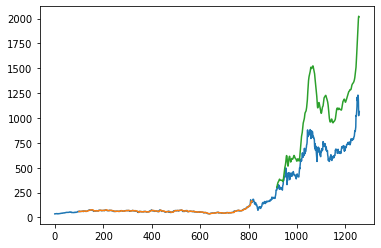

In [36]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [37]:
len(test_data)

441

In [38]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 100)

In [39]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [40]:
temp_input

[0.5198623833905723,
 0.53933285302546,
 0.532675198520385,
 0.5467860349099156,
 0.540120048718716,
 0.5392323644661551,
 0.5377416977739521,
 0.5385624228720788,
 0.5223830848230758,
 0.5098801181411152,
 0.5167136031298668,
 0.5201806146083617,
 0.5442570017912874,
 0.5298865105684641,
 0.5171909495378312,
 0.5148628432914394,
 0.5095199747485176,
 0.5111948538568951,
 0.5231535149764571,
 0.5187904364754636,
 0.5137407027617714,
 0.5088165539959439,
 0.5207416848731958,
 0.5099889894703575,
 0.5118313154550345,
 0.5372643513659876,
 0.5455131611225705,
 0.564330403619444,
 0.5643890302503141,
 0.5653772030621799,
 0.5684841222318902,
 0.5554786616695923,
 0.5677555540069438,
 0.5645983901388613,
 0.5627811605427442,
 0.5748654074476104,
 0.5706112002758593,
 0.544650574096009,
 0.5275165934774505,
 0.5470121595008981,
 0.5340150817085376,
 0.5397013289416217,
 0.5615082365090257,
 0.5633422308075782,
 0.5656117104230998,
 0.5572037846389024,
 0.5662146426163686,
 0.5821176113760168

In [41]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[1.6236552]
101
1 day input [0.53933285 0.5326752  0.54678603 0.54012005 0.53923236 0.5377417
 0.53856242 0.52238308 0.50988012 0.5167136  0.52018061 0.544257
 0.52988651 0.51719095 0.51486284 0.50951997 0.51119485 0.52315351
 0.51879044 0.5137407  0.50881655 0.52074168 0.50998899 0.51183132
 0.53726435 0.54551316 0.5643304  0.56438903 0.5653772  0.56848412
 0.55547866 0.56775555 0.56459839 0.56278116 0.57486541 0.5706112
 0.54465057 0.52751659 0.54701216 0.53401508 0.53970133 0.56150824
 0.56334223 0.56561171 0.55720378 0.56621464 0.58211761 0.58614569
 0.58478071 0.58335706 0.58434523 0.60054966 0.60134524 0.6021743
 0.58660633 0.59224228 0.59349005 0.60298664 0.60395805 0.60605165
 0.58149791 0.58921075 0.59972899 0.60115265 0.61852952 0.63274084
 0.62118419 0.62432459 0.6194423  0.61922456 0.62450885 0.62372165
 0.6255305  0.63462508 0.62782508 0.63322657 0.64476646 0.64925518
 0.65531823 0.67601138 0.69868921 0.69379859 0.69507985 0.71869565
 0.7318267  0.82828298 0.82289825 0.839

In [42]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [43]:
import matplotlib.pyplot as plt

In [44]:
len(df1)

1258

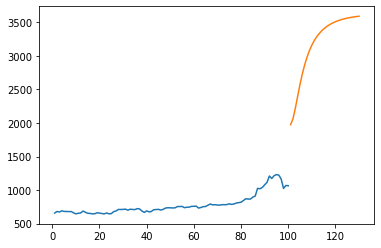

In [45]:
plt.plot(day_new,scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

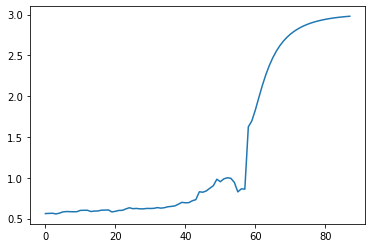

In [46]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [47]:
df3=scaler.inverse_transform(df3).tolist()

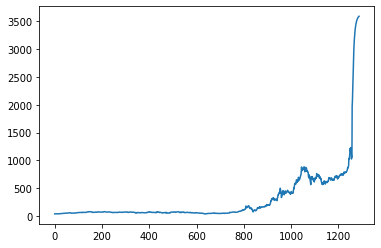

In [48]:
plt.plot(df3)